## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [2]:
your_name = "Thanh Nguyen Ho"
your_student_id = "48351059"

In [3]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [5]:
column_names = ['name', 'year', 'selling_price', 'km_driven' , 'fuel' , 'seller_type' , 'transmission' , 'Owner' ]

df = pd.read_csv('car_sell.csv', header=None, names=column_names, skipinitialspace=True)
df1= df.iloc[1:]
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,Owner
0.0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1.0,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2.0,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3.0,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4.0,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
# checking dataframe shape
df1.shape

(4340, 8)

In [7]:
print(df1.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'Owner'],
      dtype='object')


In [8]:
# checking dataframe info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4340 entries, 0.0 to 4339.0
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4030 non-null   object
 2   selling_price  4340 non-null   object
 3   km_driven      4340 non-null   object
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   Owner          4340 non-null   object
dtypes: object(8)
memory usage: 305.2+ KB


In [9]:
#before removing the missing data
df1_cleaned = df1.dropna(subset=['year'])
df1_cleaned = df1_cleaned[df1_cleaned['fuel'].str.lower() != 'none']

print('Null values before cleaning:')
print(df1.isnull().sum())


Null values before cleaning:
name               0
year             310
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
Owner              0
dtype: int64


In [10]:
print('Length before cleaning:', len(df1_cleaned))

Length before cleaning: 3886


In [11]:
#after removing the missing data
print('Null values after cleaning:')
print(df1_cleaned.isnull().sum())

Null values after cleaning:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
Owner            0
dtype: int64


In [12]:
print('Length after cleaning:', len(df1_cleaned))

Length after cleaning: 3886


In [13]:
# Display the first few rows of the cleaned DataFrame
df1_cleaned.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,Owner
0.0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1.0,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2.0,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3.0,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4.0,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


In [15]:
# Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
unique_name = unique_name = df1_cleaned['name'].nunique()
print(f"Unique names: {unique_name}")

Unique names: 1402


In [16]:
# Q2.1 
unique_seller_type = unique_seller_type = df1_cleaned['seller_type'].nunique()
print(f"Unique seller_type: {unique_seller_type}")

Unique seller_type: 3


In [17]:
# Q2.1 
unique_transmission = unique_transmission = df1_cleaned['transmission'].nunique()
print(f"Unique transmission: {unique_transmission}")

Unique transmission: 2


In [18]:
# Q2.1 
unique_Owner = unique_owner = df1_cleaned['Owner'].nunique()
print(f"Unique Owner: {unique_Owner}")

Unique Owner: 5


In [19]:
# Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
km_driven = df1['km_driven']
km_driven=pd.to_numeric(km_driven)
km_driven_stats=km_driven.describe()
print("Descriptive statistics for 'km_driven':")
print(km_driven_stats)

Descriptive statistics for 'km_driven':
count      4340.000000
mean      66215.777419
std       46644.102194
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64


In [41]:
# Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
df1_cleaned['selling_price']=pd.to_numeric(df1_cleaned['selling_price'])
df1_cleaned.groupby(('seller_type')).selling_price.describe()


,count,mean,std,min,25%,50%,75%,max
seller_type,,,,,,,,
Dealer,889.0,702093.314961,813597.811832,22000.0,300000.0,490000.0,746000.0,8900000.0
Individual,2903.0,421169.410265,420273.684129,20000.0,170000.0,300000.0,540000.0,4800000.0
Trustmark Dealer,94.0,935797.872340,655724.299195,315000.0,625000.0,750000.0,760000.0,2600000.0


In [149]:
#Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type
df1_cleaned['year']=pd.to_numeric(df1_cleaned['year'])
df1_cleaned.groupby(('Owner')).year.describe()

,count,mean,std,min,25%,50%,75%,max
Owner,,,,,,,,
First Owner,2532.0,2014.453791,3.555597,1996.0,2012.00,2015.0,2017.0,2020.0
Fourth & Above Owner,67.0,2007.238806,5.248635,1992.0,2004.00,2008.0,2010.5,2020.0
Second Owner,1000.0,2010.977000,3.840993,1995.0,2009.00,2011.5,2014.0,2019.0
Test Drive Car,14.0,2019.642857,0.633324,2018.0,2019.25,2020.0,2020.0,2020.0
Third Owner,273.0,2009.413919,3.920266,1997.0,2007.00,2010.0,2012.0,2019.0


## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [114]:
numerical = df1_cleaned[[ 'year', 'km_driven', 'selling_price']]
categorical =  df1_cleaned[['seller_type' , 'transmission' , 'Owner', 'fuel' ]]
numerical
categorical

,seller_type,transmission,Owner,fuel
0.0,Individual,Manual,First Owner,Petrol
1.0,Individual,Manual,First Owner,Petrol
2.0,Individual,Manual,First Owner,Diesel
3.0,Individual,Manual,First Owner,Petrol
4.0,Individual,Manual,Second Owner,Diesel
...,...,...,...,...
4335.0,Individual,Manual,Second Owner,Diesel
4336.0,Individual,Manual,Second Owner,Diesel
4337.0,Individual,Manual,Second Owner,Petrol
4338.0,Individual,Manual,First Owner,Diesel


                   year  km_driven  selling_price
year           1.000000  -0.409349       0.419222
km_driven     -0.409349   1.000000      -0.188057
selling_price  0.419222  -0.188057       1.000000


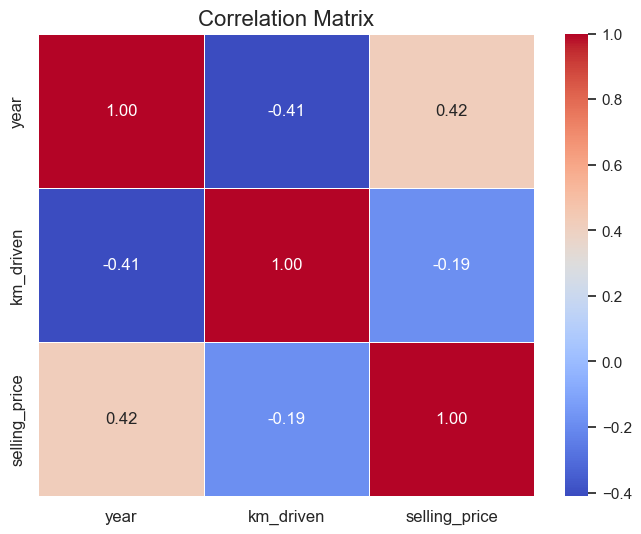

In [116]:
correlation_matrix = numerical.corr()
print(correlation_matrix)
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar=True)

# Title and labels
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13796\3681206017.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Owner', y='selling_price', data=df1_cleaned, palette='Set3')


Text(0.5, 0, 'Owner')

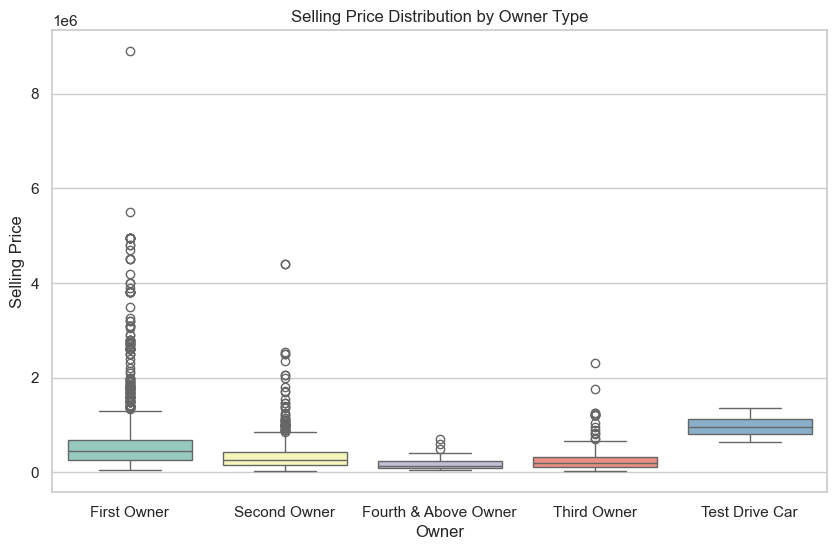

In [82]:
# Boxplot for Owner vs Selling Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Owner', y='selling_price', data=df1_cleaned, palette='Set3')
plt.title("Selling Price Distribution by Owner Type")
plt.ylabel("Selling Price")
plt.xlabel("Owner")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13796\1566798904.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel', y='selling_price', data=df1_cleaned, palette='Set2')


Text(0.5, 0, 'Fuel Type')

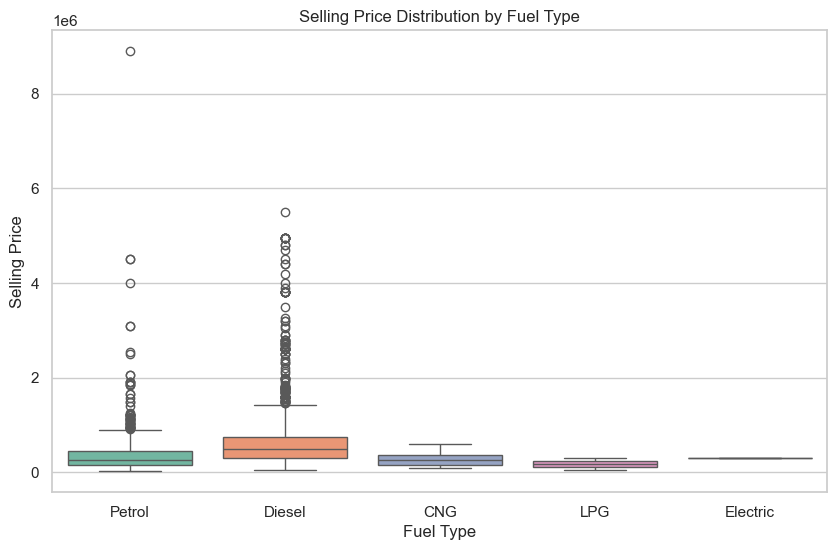

In [84]:
# 2. Boxplot for Fuel Type vs. Selling Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=df1_cleaned, palette='Set2')
plt.title("Selling Price Distribution by Fuel Type")
plt.ylabel("Selling Price")
plt.xlabel("Fuel Type")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13796\3567289543.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transmission', y='selling_price', data=df1_cleaned, palette='Set2')


Text(0.5, 0, 'Transmission')

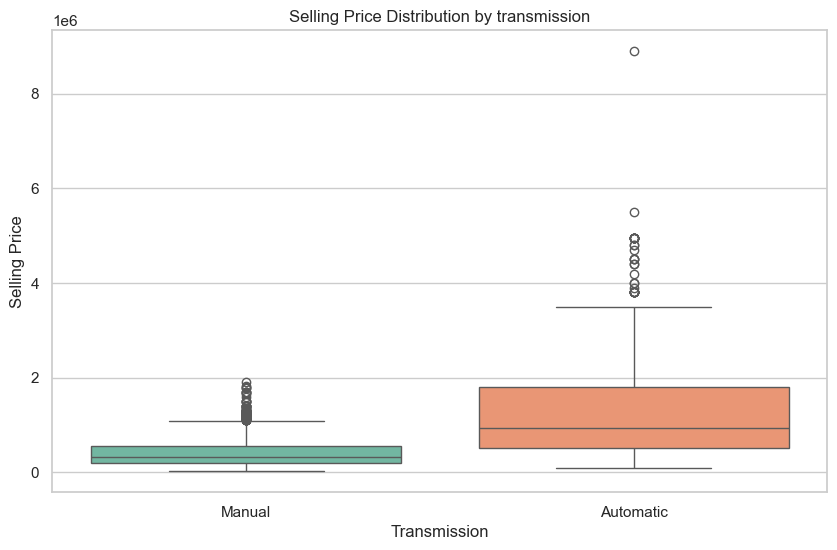

In [118]:
# 3. Boxplot for transmission vs. Selling Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='selling_price', data=df1_cleaned, palette='Set2')
plt.title("Selling Price Distribution by transmission")
plt.ylabel("Selling Price")
plt.xlabel("Transmission")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13796\4129858119.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='seller_type', y='selling_price', data=df1_cleaned, palette='Set2')


Text(0.5, 0, 'Seller Type')

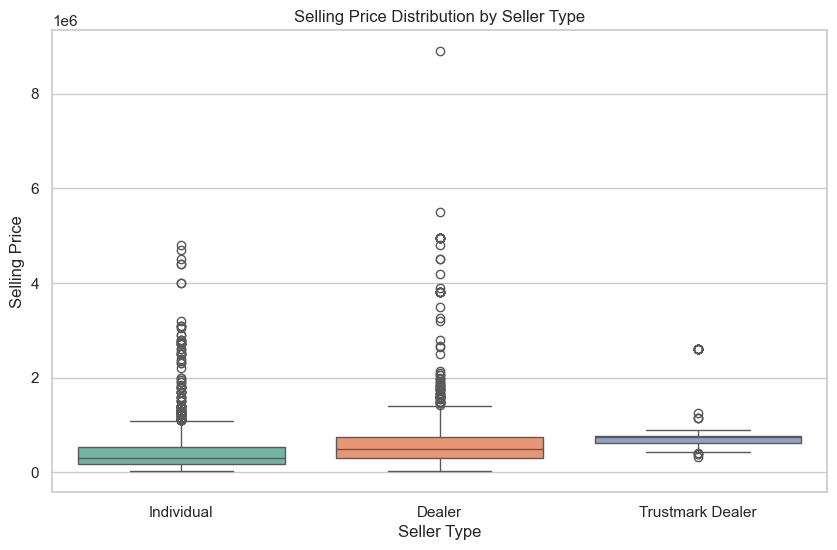

In [122]:
# 4. Boxplot for Seller Type vs. Selling Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='seller_type', y='selling_price', data=df1_cleaned, palette='Set2')
plt.title("Selling Price Distribution by Seller Type")
plt.ylabel("Selling Price")
plt.xlabel("Seller Type")

## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [141]:
#1. owner to be first, second and third owner only
filtered_df1_cleaned=  df1_cleaned[df1_cleaned['Owner'].isin(['First Owner' ,'Second Owner', 'Third Owner'])]
filtered_df1_cleaned

# 2. Fuel to be Diesel or Petrol only
filtered_df1_cleaned_2 = filtered_df1_cleaned[filtered_df1_cleaned['fuel'].isin(['Diesel', 'Petrol'])]
filtered_df1_cleaned_2

# 3. Seller_type to be dealer or individual only
filtered_df1_cleaned_3 = filtered_df1_cleaned_2[filtered_df1_cleaned_2['seller_type'].isin(['Dealer', 'Individual'])]
filtered_df1_cleaned_3

unique = filtered_df1_cleaned_3.nunique()

In [143]:
unique


name             1330
year               26
selling_price     412
km_driven         666
fuel                2
seller_type         2
transmission        2
Owner               3
dtype: int64

In [156]:
print("Length of the data:", len(filtered_df1_cleaned_3))

Length of the data: 3657
